In [30]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython.display import Audio
import csv
from scipy.signal import butter, lfilter

In [159]:
data = []
with open("data/16kHz_sampling/unknown_fs=16kHz_3.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(float(row['y']))  # Convert to int if y is numeric

    file.close()

In [160]:
data

[4.33673,
 0.79724,
 1.18489,
 2.29063,
 6.22784,
 5.06264,
 2.99151,
 1.63503,
 2.84633,
 3.89267,
 2.1114,
 2.87204,
 3.34157,
 2.6357,
 4.82767,
 7.81804,
 5.06022,
 3.40983,
 0.544,
 2.88051,
 4.44466,
 2.14552,
 4.61386,
 2.96188,
 6.09507,
 3.96917,
 1.98532,
 5.00234,
 8.98345,
 5.74428,
 2.21196,
 4.94949,
 2.93766,
 6.28516,
 5.50053,
 4.96346,
 3.72221,
 0.93764,
 3.94564,
 2.66256,
 2.87842,
 4.08999,
 1.02481,
 -0.02955,
 1.76112,
 1.30393,
 5.57847,
 6.99331,
 2.00049,
 1.91342,
 0.21567,
 2.79074,
 3.06488,
 0.18415,
 6.90333,
 7.04704,
 -0.53368,
 3.90067,
 3.1693,
 0.49552,
 2.62056,
 1.34609,
 10.44739,
 5.62334,
 7.66552,
 11.49011,
 0.95971,
 4.70557,
 6.92555,
 2.29655,
 6.66683,
 6.24266,
 2.08672,
 3.0221,
 1.95754,
 6.92135,
 1.21385,
 2.19922,
 7.05765,
 4.91986,
 7.23893,
 7.00538,
 9.45553,
 6.87839,
 6.57572,
 8.41839,
 10.71773,
 4.03064,
 6.51825,
 8.92718,
 6.21118,
 9.00373,
 12.99174,
 11.81806,
 8.50382,
 3.22345,
 4.69758,
 3.95084,
 6.48218,
 14.4791,

In [161]:
len(data)

16000

In [162]:
data = np.array(data, dtype=np.float32)

In [163]:
len(data)

16000

In [164]:
Audio(data, rate=16e3, autoplay=True)

In [ ]:
resampled = librosa.resample(data, orig_sr=40e3, target_sr=16e3)

In [ ]:
display.Audio(resampled[int(3e3):int(19e3)], rate=16e3)

In [ ]:
selected = resampled[int(6e3):int(22e3)]

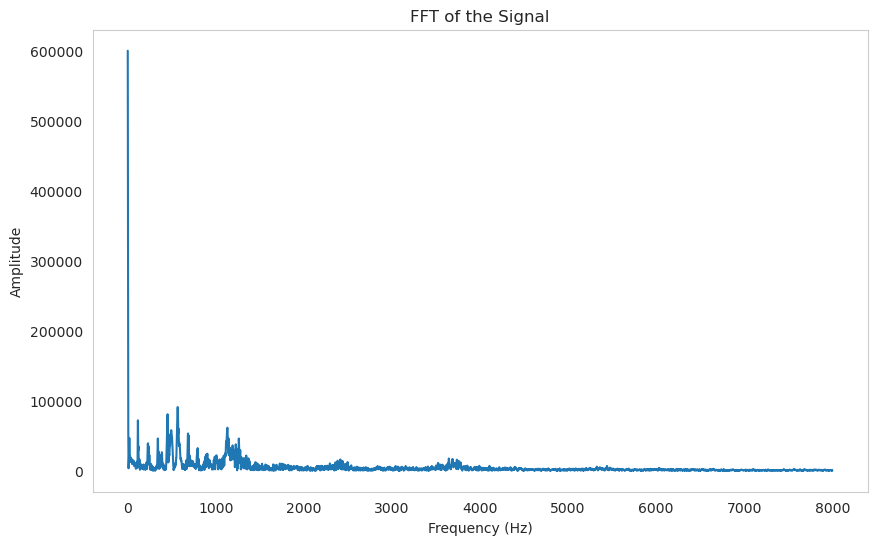

In [53]:
fft_result = np.fft.fft(abs(data))
fft_freqs = np.fft.fftfreq(len(data), d=1/16000)  # Frequency bins

# Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:16000 // 2], np.abs(fft_result)[:16000 // 2])  # One-sided spectrum
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [ ]:
selected /= np.max(selected)

# Filter raw data with bufferworth filter

In [ ]:
fs = 16e3
cutoff = 4e3
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(3, normal_cutoff, btype='lowpass', analog=False)

y = lfilter(b, a, data)
y = [0 if item is None else item for item in y]
y = np.array(y, dtype=np.float32)

In [ ]:
contains_none = any(item is None for item in y)

print(contains_none)

# Highpass filter

In [ ]:
fs = 16e3
cutoff = 200
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(6, normal_cutoff, btype='highpass', analog=False)

y_highpass = lfilter(b, a, y)
y_highpass = [0 if item is None else item for item in y_highpass]
y_highpass= np.array(y_highpass, dtype=np.float32)

In [ ]:
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(y_highpass, label='Filtered Signal', color='orange')
plt.title('Filtered Signal (Lowpass)')
plt.ylabel('Amplitude')
plt.grid()

In [ ]:
display.Audio(y_highpass, rate=16e3)

In [ ]:
D = librosa.stft(data, n_fft=256, hop_length=128, window='hann')

# Convert the complex-valued STFT to a magnitude spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

In [ ]:
plt.plot(selected)